<a href="https://colab.research.google.com/github/gabriellabc/monitoramento_agua_superficial_subterranea/blob/main/Final_%5BTCC%5D_RegressaoLinear_Supervisionado_IQA_Superficial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pré-processamento**

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Base de dados/FINAL_IQA_ Parametros_AguaSuperficial_2014a2023 - Página1.csv')

In [ ]:
dados.head()

,Município,Código Ponto,Data Coleta,Parametro,Valor,Unidade,Tipo de Sistema Hídrico,Tipo Parâmetro,Precipitação [mm]
0,ARARAS,ARAS02900,18/02/2014,"DBO (5, 20) [mg/L]","3,00",mg/L,Rio (Lótico),03- Químicos,60
1,ARARAS,ARAS02900,22/04/2014,"DBO (5, 20) [mg/L]","8,00",mg/L,Rio (Lótico),03- Químicos,60
2,ARARAS,ARAS02900,11/06/2014,"DBO (5, 20) [mg/L]","12,00",mg/L,Rio (Lótico),03- Químicos,20
3,ARARAS,ARAS02900,12/08/2014,"DBO (5, 20) [mg/L]","9,00",mg/L,Rio (Lótico),03- Químicos,10
4,ARARAS,ARAS02900,15/10/2014,"DBO (5, 20) [mg/L]","18,00",mg/L,Rio (Lótico),03- Químicos,60


In [ ]:
dados = dados.drop(['Município','Unidade','Tipo Parâmetro','Tipo de Sistema Hídrico'], axis=1)
dados

,Código Ponto,Data Coleta,Parametro,Valor,Precipitação [mm]
0,ARAS02900,18/02/2014,"DBO (5, 20) [mg/L]","3,00",60
1,ARAS02900,22/04/2014,"DBO (5, 20) [mg/L]","8,00",60
2,ARAS02900,11/06/2014,"DBO (5, 20) [mg/L]","12,00",20
3,ARAS02900,12/08/2014,"DBO (5, 20) [mg/L]","9,00",10
4,ARAS02900,15/10/2014,"DBO (5, 20) [mg/L]","18,00",60
...,...,...,...,...,...
13872,TELA02700,30/11/2022,Sólido Total [mg/L],"50,00",150
13873,TELA02700,14/02/2023,Sólido Total [mg/L],"56,00",250
13874,TELA02700,16/05/2023,Sólido Total [mg/L],"50,00",60
13875,TELA02700,16/08/2023,Sólido Total [mg/L],"50,00",20


In [ ]:
dados_pivot = dados.pivot_table(index=['Data Coleta', 'Código Ponto','Precipitação [mm]'],
                          columns='Parametro',
                          values='Valor',
                          aggfunc='first').reset_index()

In [ ]:
dados_pivot

Parametro,Data Coleta,Código Ponto,Precipitação [mm],"DBO (5, 20) [mg/L]",Escherichia coli** [UFC/100mL],Fósforo Total [mg/L],Nitrogênio Total [mg/L],Oxigênio Dissolvido [mg/L],Sólido Total [mg/L],Temperatura da Água [ºC],Turbidez [UNT],pH [U.pH]
0,01/02/2016,MOGU02900,200,"2,00","18,00","0,05",NaN,"4,57","172,00","27,30","65,00","6,81"
1,01/02/2016,SETA04600,200,"3,00","87.000,00","0,20",NaN,"4,78","194,00","25,90","60,00","7,07"
2,01/02/2017,MOGU02900,80,"2,00","1.340,00","0,06",NaN,"4,69","106,00","24,30","50,00","6,87"
3,01/02/2017,SETA04600,80,"3,00","24.000,00","0,28",NaN,"4,73","134,00","22,10","39,00","7,05"
4,01/02/2018,MOGU02900,200,"2,00","3.800,00","0,06",NaN,"5,80","135,00","26,50","50,00","7,19"
...,...,...,...,...,...,...,...,...,...,...,...,...
1778,30/11/2022,RICO02200,150,NaN,"27,00","0,07",NaN,"0,91","170,00","22,10","30,00","6,39"
1779,30/11/2022,RICO02600,150,NaN,"440,00","0,30",NaN,"7,35","163,00","22,60","75,00","7,08"
1780,30/11/2022,RICO03900,150,NaN,"14.000,00","0,30",NaN,"5,67","132,00","23,00","80,00","6,91"
1781,30/11/2022,RONC02800,150,NaN,"840,00","0,10",NaN,"6,80","98,00","22,90","60,00","6,84"


In [ ]:
dados_final = dados_pivot.drop(['Data Coleta','Código Ponto'], axis=1)

In [ ]:
dados_final.shape

(1783, 10)

In [ ]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Precipitação [mm]               1783 non-null   int64 
 1   DBO (5, 20) [mg/L]              1410 non-null   object
 2   Escherichia coli** [UFC/100mL]  1770 non-null   object
 3   Fósforo Total [mg/L]            1782 non-null   object
 4   Nitrogênio Total [mg/L]         40 non-null     object
 5   Oxigênio Dissolvido [mg/L]      1779 non-null   object
 6   Sólido Total [mg/L]             1767 non-null   object
 7   Temperatura da Água [ºC]        1779 non-null   object
 8   Turbidez [UNT]                  1771 non-null   object
 9   pH [U.pH]                       1779 non-null   object
dtypes: int64(1), object(9)
memory usage: 139.4+ KB


**Transformar outras colunas para float**

In [ ]:
for columns in dados_final.columns:
    if dados_final[columns].dtype == 'object':
        dados_final[columns] = dados_final[columns].str.replace(',', '.', regex=False)
        dados_final[columns] = dados_final[columns].str.replace(r'\.(?=\d{3})', '', regex=True)
        dados_final[columns] = pd.to_numeric(dados_final[columns], errors='coerce')
        dados_final[columns] = pd.to_numeric(dados_final[columns], errors='coerce')

In [ ]:
dados_final.head()

Parametro,Precipitação [mm],"DBO (5, 20) [mg/L]",Escherichia coli** [UFC/100mL],Fósforo Total [mg/L],Nitrogênio Total [mg/L],Oxigênio Dissolvido [mg/L],Sólido Total [mg/L],Temperatura da Água [ºC],Turbidez [UNT],pH [U.pH]
0,200,2.0,18.0,0.05,NaN,4.57,172.0,27.3,65.0,6.81
1,200,3.0,87000.0,0.20,NaN,4.78,194.0,25.9,60.0,7.07
2,80,2.0,1340.0,0.06,NaN,4.69,106.0,24.3,50.0,6.87
3,80,3.0,24000.0,0.28,NaN,4.73,134.0,22.1,39.0,7.05
4,200,2.0,3800.0,0.06,NaN,5.80,135.0,26.5,50.0,7.19


In [ ]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Precipitação [mm]               1783 non-null   int64  
 1   DBO (5, 20) [mg/L]              1410 non-null   float64
 2   Escherichia coli** [UFC/100mL]  1770 non-null   float64
 3   Fósforo Total [mg/L]            1782 non-null   float64
 4   Nitrogênio Total [mg/L]         40 non-null     float64
 5   Oxigênio Dissolvido [mg/L]      1779 non-null   float64
 6   Sólido Total [mg/L]             1767 non-null   float64
 7   Temperatura da Água [ºC]        1779 non-null   float64
 8   Turbidez [UNT]                  1771 non-null   float64
 9   pH [U.pH]                       1779 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 139.4 KB


# **Tratar dados desconhecidos/nulos**

In [ ]:
import numpy as np

In [ ]:
for column in dados_final.select_dtypes(include=np.number).columns:
    dados_final[column] = dados_final[column].fillna(dados_final[column].median())

In [ ]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Precipitação [mm]               1783 non-null   int64  
 1   DBO (5, 20) [mg/L]              1783 non-null   float64
 2   Escherichia coli** [UFC/100mL]  1783 non-null   float64
 3   Fósforo Total [mg/L]            1783 non-null   float64
 4   Nitrogênio Total [mg/L]         1783 non-null   float64
 5   Oxigênio Dissolvido [mg/L]      1783 non-null   float64
 6   Sólido Total [mg/L]             1783 non-null   float64
 7   Temperatura da Água [ºC]        1783 non-null   float64
 8   Turbidez [UNT]                  1783 non-null   float64
 9   pH [U.pH]                       1783 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 139.4 KB


# **Calculando IQA**

In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

Transformando Oxigênio Dissolvido (OD)

In [ ]:
def calcular_od_saturado(od_mg_l, temperatura):

    if pd.isna(temperatura) or pd.isna(od_mg_l) or temperatura is None or od_mg_l is None:
        return np.nan

    def calcular_od_saturado_temp(temperatura):
        if temperatura is None:
            return None
        od_sat = 14.652 - 0.41022 * temperatura + 0.007991 * temperatura**2 - 0.000077774 * temperatura**3
        return od_sat

    od_sat_mg_l = calcular_od_saturado_temp(temperatura)

    if od_sat_mg_l is None or od_sat_mg_l <= 0:
        return np.nan

    saturacao = (od_mg_l / od_sat_mg_l) * 100
    return saturacao


In [ ]:
dados_final['OD_Saturacao [%]'] = dados_final.apply(lambda row: calcular_od_saturado(row['Oxigênio Dissolvido [mg/L]'], row['Temperatura da Água [ºC]']), axis=1)

In [ ]:
dados_final

Parametro,Precipitação [mm],"DBO (5, 20) [mg/L]",Escherichia coli** [UFC/100mL],Fósforo Total [mg/L],Nitrogênio Total [mg/L],Oxigênio Dissolvido [mg/L],Sólido Total [mg/L],Temperatura da Água [ºC],Turbidez [UNT],pH [U.pH],OD_Saturacao [%]
0,200,2.0,18.0,0.05,2.17,4.57,172.0,27.3,65.0,6.81,58.393719
1,200,3.0,87000.0,0.20,2.17,4.78,194.0,25.9,60.0,7.07,59.478622
2,80,2.0,1340.0,0.06,2.17,4.69,106.0,24.3,50.0,6.87,56.599531
3,80,3.0,24000.0,0.28,2.17,4.73,134.0,22.1,39.0,7.05,54.684985
4,200,2.0,3800.0,0.06,2.17,5.80,135.0,26.5,50.0,7.19,72.997250
...,...,...,...,...,...,...,...,...,...,...,...
1778,150,2.0,27.0,0.07,2.17,0.91,170.0,22.1,30.0,6.39,10.520790
1779,150,2.0,440.0,0.30,2.17,7.35,163.0,22.6,75.0,7.08,85.816844
1780,150,2.0,14000.0,0.30,2.17,5.67,132.0,23.0,80.0,6.91,66.722345
1781,150,2.0,840.0,0.10,2.17,6.80,98.0,22.9,60.0,6.84,79.863432


In [ ]:
dados_final = dados_final.drop(columns=['Oxigênio Dissolvido [mg/L]'])

In [ ]:
dados_final.rename(columns={'OD_Saturacao [%]': 'Oxigênio Dissolvido [mg/L]'}, inplace=True)

In [ ]:
dados_final

Parametro,Precipitação [mm],"DBO (5, 20) [mg/L]",Escherichia coli** [UFC/100mL],Fósforo Total [mg/L],Nitrogênio Total [mg/L],Sólido Total [mg/L],Temperatura da Água [ºC],Turbidez [UNT],pH [U.pH],Oxigênio Dissolvido [mg/L]
0,200,2.0,18.0,0.05,2.17,172.0,27.3,65.0,6.81,58.393719
1,200,3.0,87000.0,0.20,2.17,194.0,25.9,60.0,7.07,59.478622
2,80,2.0,1340.0,0.06,2.17,106.0,24.3,50.0,6.87,56.599531
3,80,3.0,24000.0,0.28,2.17,134.0,22.1,39.0,7.05,54.684985
4,200,2.0,3800.0,0.06,2.17,135.0,26.5,50.0,7.19,72.997250
...,...,...,...,...,...,...,...,...,...,...
1778,150,2.0,27.0,0.07,2.17,170.0,22.1,30.0,6.39,10.520790
1779,150,2.0,440.0,0.30,2.17,163.0,22.6,75.0,7.08,85.816844
1780,150,2.0,14000.0,0.30,2.17,132.0,23.0,80.0,6.91,66.722345
1781,150,2.0,840.0,0.10,2.17,98.0,22.9,60.0,6.84,79.863432


In [ ]:
def calcular_qi(parametro, valor):


    if parametro == 'Escherichia coli** [UFC/100mL]':
        x = [1, 10, 100, 1000, 10000, 100000]
        y = [100, 90, 70, 50, 20, 3]
        f = interp1d(np.log10(x), y, kind='linear', fill_value="extrapolate")
        if valor > 100000:
          qi = 3
        elif valor <= 0:
          qi = 100
        else:
          qi = f(np.log10(valor))
        return qi

    elif parametro == 'pH [U.pH]':
        x = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
        y = [2, 10, 30, 60, 90, 100, 90, 60, 30, 10, 3]
        f = interp1d(x, y, kind='linear', fill_value="extrapolate")
        if valor < 2:
            qi = 2
        elif valor > 12:
            qi = 3
        else:
          qi = f(valor)
        return qi

    elif parametro == 'DBO (5, 20) [mg/L]':
        x = [0, 5, 10, 15, 20, 25, 30]
        y = [100, 70, 40, 25, 15, 10, 2]
        f = interp1d(x, y, kind='linear', fill_value="extrapolate")
        if valor > 30:
            qi = 2
        elif valor == 0:
          qi = 100
        else:
          qi = f(valor)
        return qi

    elif parametro == 'Nitrogênio Total [mg/L]':
        x = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
        y = [100, 75, 55, 40, 30, 20, 15, 10, 7, 5, 1]
        f = interp1d(x, y, kind='linear', fill_value="extrapolate")
        if valor > 100:
          qi = 1
        elif valor == 0:
          qi = 100
        else:
          qi = f(valor)
        return qi

    elif parametro == 'Fósforo Total [mg/L]':
        x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        y = [100, 60, 35, 20, 12, 8, 6, 5, 5, 5, 5]
        f = interp1d(x, y, kind='linear', fill_value="extrapolate")
        if valor > 10:
          qi = 5
        elif valor == 0:
          qi = 100
        else:
          qi = f(valor)
        return qi

    elif parametro == 'Temperatura da Água [ºC]':
          qi = 94
          return qi

    elif parametro == 'Turbidez [UNT]':
        x = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
        y = [100, 90, 75, 60, 50, 40, 35, 30, 25, 20, 5]
        f = interp1d(x, y, kind='linear', fill_value="extrapolate")
        if valor > 100:
          qi = 5
        elif valor == 0:
          qi = 100
        else:
          qi = f(valor)
        return qi

    elif parametro == 'Sólido Total [mg/L]':
        x = [0, 100, 200, 300, 400, 500]
        y = [90, 85, 70, 50, 40, 32]
        f = interp1d(x, y, kind='linear', fill_value="extrapolate")
        if valor > 500:
          qi = 32
        elif valor == 0:
          qi = 80
        else:
          qi = f(valor)
        return qi


    elif parametro == 'Oxigênio Dissolvido [mg/L]':
            x = [0, 20, 40, 60, 80, 100, 120, 140]
            y = [0, 20, 50, 80, 95, 100, 85, 47]
            f = interp1d(x, y, kind='linear', fill_value="extrapolate")
            if valor > 140:
                qi = 47
            elif valor < 0:
                qi = 0
            else:
                qi = f(valor)
            return qi


In [ ]:
def calcular_iqa(dados_final):
    pesos = {
        'pH [U.pH]': 0.12,
        'Escherichia coli** [UFC/100mL]': 0.15,
        'DBO (5, 20) [mg/L]': 0.10,
        'Nitrogênio Total [mg/L]': 0.10,
        'Fósforo Total [mg/L]': 0.10,
        'Temperatura da Água [ºC]': 0.10,
        'Turbidez [UNT]': 0.08,
        'Sólido Total [mg/L]': 0.08,
        'Oxigênio Dissolvido [mg/L]': 0.17
    }
    iqa_valores = []
    for index, row in dados_final.iterrows(): #Fixed indentation
        qi_valores = []
        for parametro in pesos:
            valor = row[parametro]  # Acessa o valor do parâmetro atual
            qi = calcular_qi(parametro, valor)
            qi_valores.append(qi)
        if np.isnan(qi_valores).any():  # Verifica se algum qi é NaN
            iqa = np.nan
        else:
            iqa = np.prod([qi**(pesos[list(pesos.keys())[i]]) for i, qi in enumerate(qi_valores)])
        iqa_valores.append(iqa)
    return iqa_valores

In [ ]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Precipitação [mm]               1783 non-null   int64  
 1   DBO (5, 20) [mg/L]              1783 non-null   float64
 2   Escherichia coli** [UFC/100mL]  1783 non-null   float64
 3   Fósforo Total [mg/L]            1783 non-null   float64
 4   Nitrogênio Total [mg/L]         1783 non-null   float64
 5   Sólido Total [mg/L]             1783 non-null   float64
 6   Temperatura da Água [ºC]        1783 non-null   float64
 7   Turbidez [UNT]                  1783 non-null   float64
 8   pH [U.pH]                       1783 non-null   float64
 9   Oxigênio Dissolvido [mg/L]      1783 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 139.4 KB


In [ ]:
dados_final['IQA'] = calcular_iqa(dados_final)

In [ ]:
dados_final

Parametro,Precipitação [mm],"DBO (5, 20) [mg/L]",Escherichia coli** [UFC/100mL],Fósforo Total [mg/L],Nitrogênio Total [mg/L],Sólido Total [mg/L],Temperatura da Água [ºC],Turbidez [UNT],pH [U.pH],Oxigênio Dissolvido [mg/L],IQA
0,200,2.0,18.0,0.05,2.17,172.0,27.3,65.0,6.81,58.393719,81.029668
1,200,3.0,87000.0,0.20,2.17,194.0,25.9,60.0,7.07,59.478622,50.983289
2,80,2.0,1340.0,0.06,2.17,106.0,24.3,50.0,6.87,56.599531,75.524730
3,80,3.0,24000.0,0.28,2.17,134.0,22.1,39.0,7.05,54.684985,62.396674
4,200,2.0,3800.0,0.06,2.17,135.0,26.5,50.0,7.19,72.997250,73.552422
...,...,...,...,...,...,...,...,...,...,...,...
1778,150,2.0,27.0,0.07,2.17,170.0,22.1,30.0,6.39,10.520790,59.864566
1779,150,2.0,440.0,0.30,2.17,163.0,22.6,75.0,7.08,85.816844,77.560222
1780,150,2.0,14000.0,0.30,2.17,132.0,23.0,80.0,6.91,66.722345,63.392373
1781,150,2.0,840.0,0.10,2.17,98.0,22.9,60.0,6.84,79.863432,78.989200


In [ ]:
dados_final.to_csv("IQA_calculado.csv", index=False)

In [ ]:
dados_final.to_excel("IQA_calculado.xlsx", index=False)

In [ ]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Precipitação [mm]               1783 non-null   int64  
 1   DBO (5, 20) [mg/L]              1783 non-null   float64
 2   Escherichia coli** [UFC/100mL]  1783 non-null   float64
 3   Fósforo Total [mg/L]            1783 non-null   float64
 4   Nitrogênio Total [mg/L]         1783 non-null   float64
 5   Sólido Total [mg/L]             1783 non-null   float64
 6   Temperatura da Água [ºC]        1783 non-null   float64
 7   Turbidez [UNT]                  1783 non-null   float64
 8   pH [U.pH]                       1783 non-null   float64
 9   Oxigênio Dissolvido [mg/L]      1783 non-null   float64
 10  IQA                             1783 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 153.4 KB


**Classificar IQA**

#Correlação

In [ ]:
corr = dados_final.corr()
corr

Parametro,Precipitação [mm],"DBO (5, 20) [mg/L]",Escherichia coli** [UFC/100mL],Fósforo Total [mg/L],Nitrogênio Total [mg/L],Sólido Total [mg/L],Temperatura da Água [ºC],Turbidez [UNT],pH [U.pH],Oxigênio Dissolvido [mg/L],IQA
Parametro,,,,,,,,,,,
Precipitação [mm],1.000000,-0.075863,-0.012716,-0.016373,-0.004319,0.210194,0.561055,0.285798,-0.107641,-0.017564,-0.200789
"DBO (5, 20) [mg/L]",-0.075863,1.000000,0.658393,0.603022,0.083857,0.324375,-0.007421,0.045397,0.068407,-0.350352,-0.563230
Escherichia coli** [UFC/100mL],-0.012716,0.658393,1.000000,0.622908,0.088253,0.332190,0.036816,0.064011,0.099880,-0.308384,-0.547587
Fósforo Total [mg/L],-0.016373,0.603022,0.622908,1.000000,0.070915,0.430273,0.029810,0.139926,0.136514,-0.320616,-0.561882
Nitrogênio Total [mg/L],-0.004319,0.083857,0.088253,0.070915,1.000000,0.041658,0.015605,-0.000221,0.041287,-0.021160,-0.085407
Sólido Total [mg/L],0.210194,0.324375,0.332190,0.430273,0.041658,1.000000,0.131796,0.822035,0.071749,-0.098918,-0.544714
Temperatura da Água [ºC],0.561055,-0.007421,0.036816,0.029810,0.015605,0.131796,1.000000,0.103493,0.005474,-0.064464,-0.129199
Turbidez [UNT],0.285798,0.045397,0.064011,0.139926,-0.000221,0.822035,0.103493,1.000000,-0.015876,0.098104,-0.346731
pH [U.pH],-0.107641,0.068407,0.099880,0.136514,0.041287,0.071749,0.005474,-0.015876,1.000000,0.297308,-0.008069


In [ ]:
corr['IQA'].to_frame()

,IQA
Parametro,
Precipitação [mm],-0.200789
"DBO (5, 20) [mg/L]",-0.563230
Escherichia coli** [UFC/100mL],-0.547587
Fósforo Total [mg/L],-0.561882
Nitrogênio Total [mg/L],-0.085407
Sólido Total [mg/L],-0.544714
Temperatura da Água [ºC],-0.129199
Turbidez [UNT],-0.346731
pH [U.pH],-0.008069


# **Regressão Linear com variável independente**

In [ ]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(dados_final['Sólido Total [mg/L]'], dados_final['IQA'])

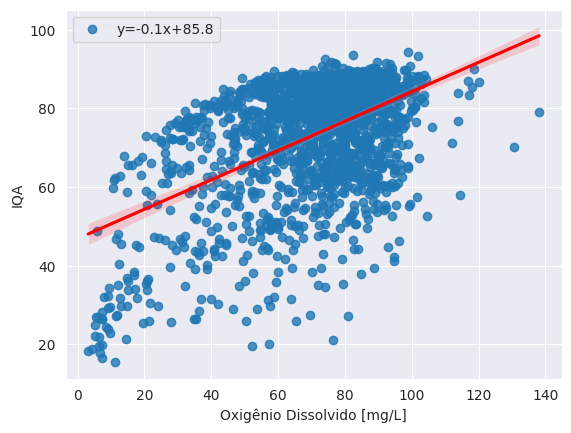

In [ ]:
sns.set_style("darkgrid")
sns.regplot(x="Oxigênio Dissolvido [mg/L]", y="IQA", data=dados_final, line_kws={'color':'red'},label=f"y={slope:.1f}x+{intercept:.1f}").legend(loc="best")
plt.show()

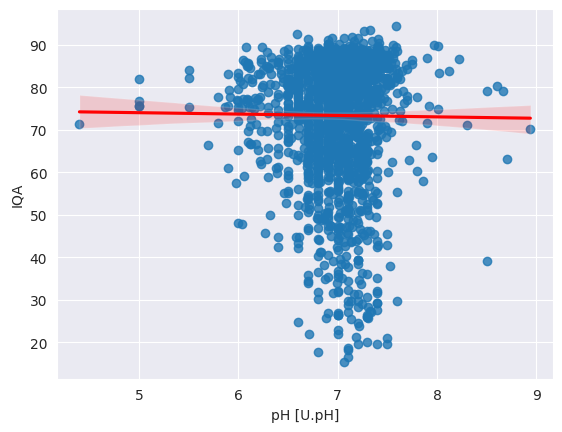

In [ ]:
sns.set_style("darkgrid")
sns.regplot(x="pH [U.pH]", y="IQA", data=dados_final, line_kws={'color':'red'})
plt.show()

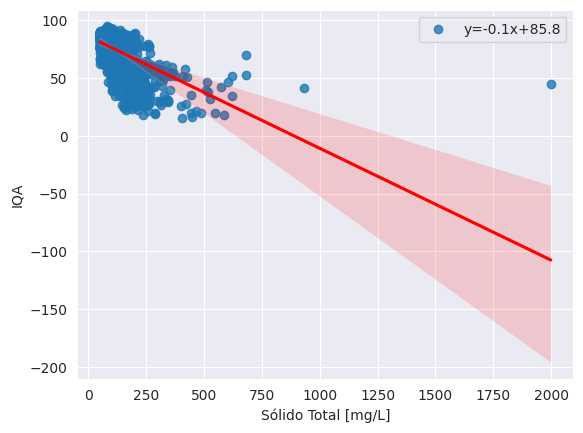

In [ ]:
sns.set_style("darkgrid")
sns.regplot(x="Sólido Total [mg/L]", y="IQA", data=dados_final, line_kws={'color':'red'}, label=f"y={slope:.1f}x+{intercept:.1f}").legend(loc="best")
plt.show()

**Investigando o comportamento e a distribuição de frequências da variável dependente**

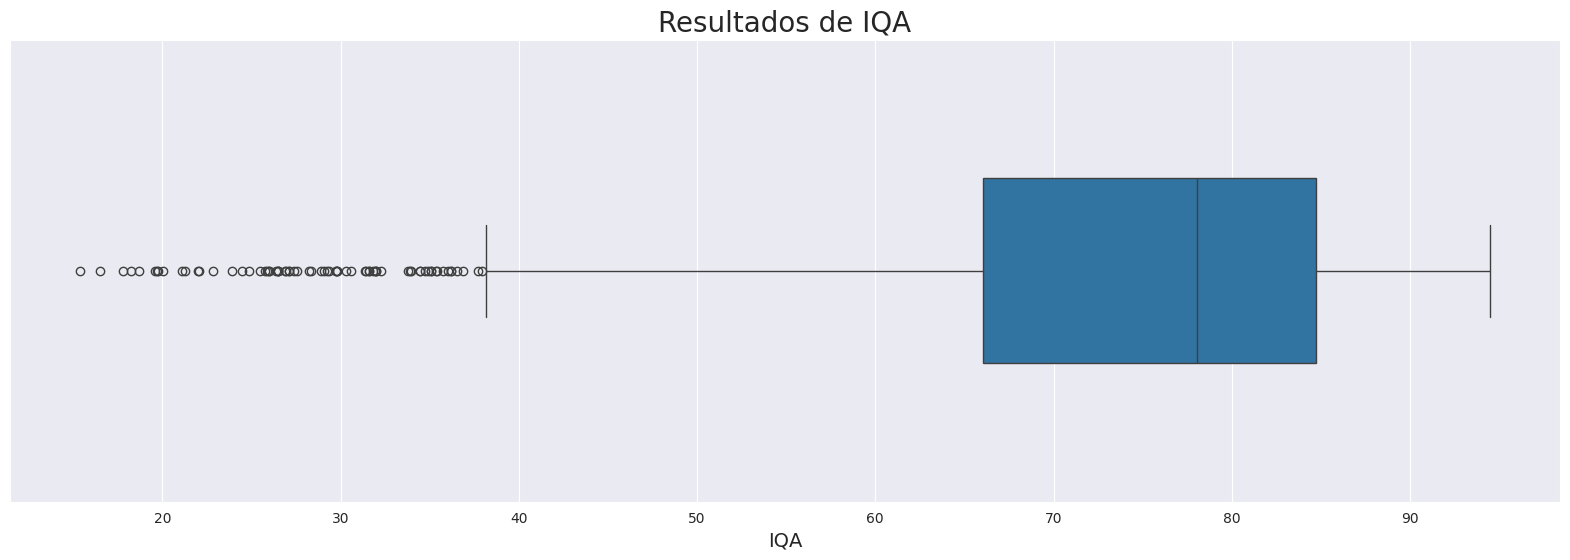

In [ ]:
ax = sns.boxplot(x="IQA", data=dados_final, width=0.4)

ax.figure.set_size_inches(20, 6)
ax.set_title("Resultados de IQA", fontsize=20)
ax.set_xlabel("IQA", fontsize=14)

plt.show()

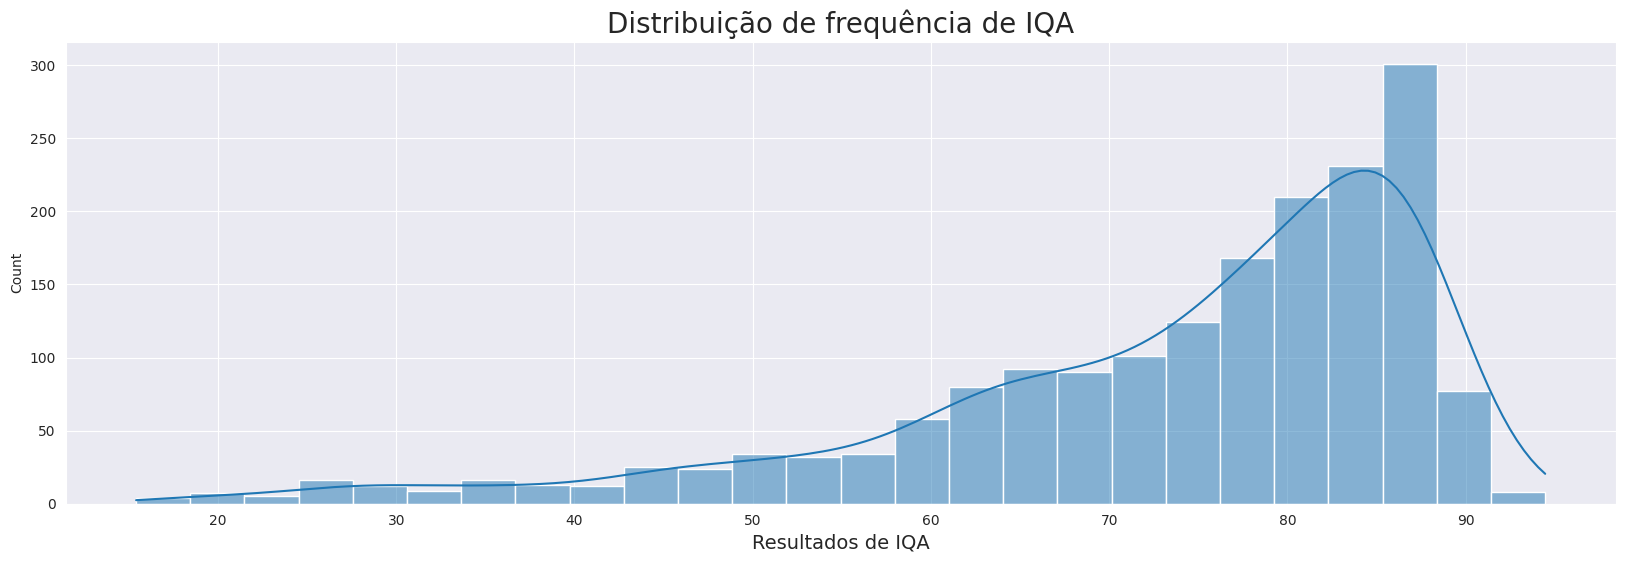

In [ ]:
ax=sns.histplot(data=dados_final, x="IQA", kde=True)

ax.figure.set_size_inches(20, 6)
ax.set_title("Distribuição de frequência de IQA", fontsize=20)
ax.set_xlabel("Resultados de IQA", fontsize=14)
plt.show()

# **Analisando variáveis independentes**

In [ ]:
dados_final.columns

Index(['Precipitação [mm]', 'DBO (5, 20) [mg/L]',
       'Escherichia coli** [UFC/100mL]', 'Fósforo Total [mg/L]',
       'Nitrogênio Total [mg/L]', 'Sólido Total [mg/L]',
       'Temperatura da Água [ºC]', 'Turbidez [UNT]', 'pH [U.pH]',
       'Oxigênio Dissolvido [mg/L]', 'IQA'],
      dtype='object', name='Parametro')

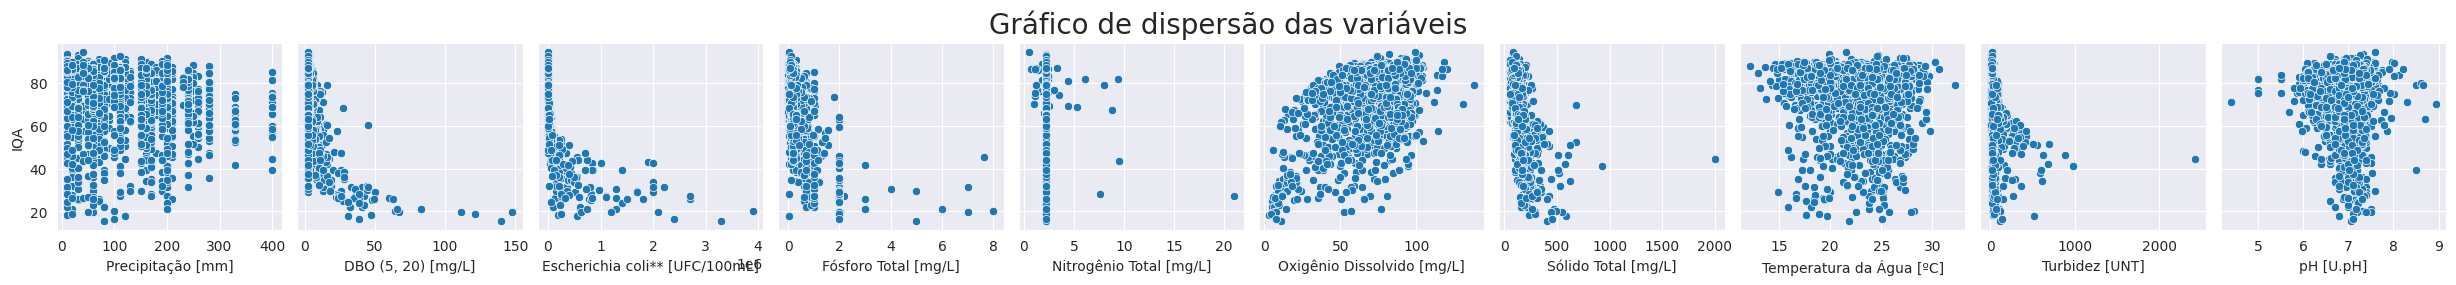

In [ ]:
ax = sns.pairplot(data=dados_final, y_vars="IQA", x_vars=['Precipitação [mm]', 'DBO (5, 20) [mg/L]',
       'Escherichia coli** [UFC/100mL]', 'Fósforo Total [mg/L]',
       'Nitrogênio Total [mg/L]', 'Oxigênio Dissolvido [mg/L]',
       'Sólido Total [mg/L]', 'Temperatura da Água [ºC]', 'Turbidez [UNT]',
       'pH [U.pH]'])

ax.figure.suptitle("Gráfico de dispersão das variáveis", fontsize=20, y=1.10)
plt.show()

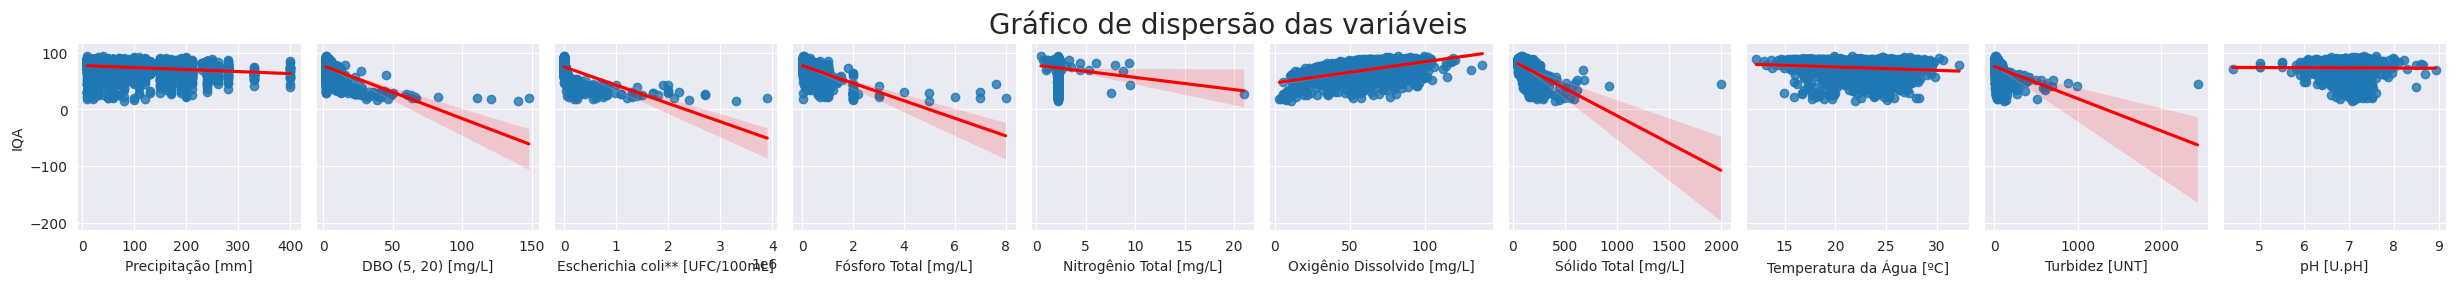

In [ ]:
ax = sns.pairplot(data=dados_final, y_vars="IQA", x_vars=['Precipitação [mm]', 'DBO (5, 20) [mg/L]',
       'Escherichia coli** [UFC/100mL]', 'Fósforo Total [mg/L]',
       'Nitrogênio Total [mg/L]', 'Oxigênio Dissolvido [mg/L]',
       'Sólido Total [mg/L]', 'Temperatura da Água [ºC]', 'Turbidez [UNT]',
       'pH [U.pH]'],
        kind='reg', plot_kws={'line_kws':{'color':'red'}})

ax.figure.suptitle("Gráfico de dispersão das variáveis", fontsize=20, y=1.10)
plt.show()

# **Transformação dos dados com Log**

In [ ]:
dados_final.describe().round(2)

Parametro,Precipitação [mm],"DBO (5, 20) [mg/L]",Escherichia coli** [UFC/100mL],Fósforo Total [mg/L],Nitrogênio Total [mg/L],Sólido Total [mg/L],Temperatura da Água [ºC],Turbidez [UNT],pH [U.pH],Oxigênio Dissolvido [mg/L],IQA
count,1783.00,1783.00,1783.00,1783.00,1783.00,1783.00,1783.00,1783.00,1783.00,1783.00,1783.00
mean,112.82,4.22,52854.55,0.25,2.20,128.64,22.58,43.91,6.98,70.97,73.40
std,85.01,9.00,253212.15,0.54,0.59,83.96,3.27,90.78,0.37,20.56,14.90
min,10.00,2.00,1.00,0.01,0.50,50.00,12.20,1.10,4.40,3.17,15.41
25%,40.00,2.00,294.00,0.06,2.17,98.00,19.90,13.00,6.80,60.34,66.06
50%,80.00,2.00,1230.00,0.10,2.17,106.00,23.20,21.00,7.00,75.66,78.04
75%,175.00,3.00,7250.00,0.20,2.17,145.00,25.10,44.50,7.20,85.53,84.70
max,400.00,148.00,3900000.00,8.00,21.00,1998.00,32.20,2432.00,8.94,138.12,94.46


In [ ]:
dados_final['log_IQA'] = np.log(dados_final['IQA'])
dados_final['log_Precipitação [mm]'] = np.log(dados_final['Precipitação [mm]'])
dados_final['log_DBO (5, 20) [mg/L]'] = np.log(dados_final['DBO (5, 20) [mg/L]'])
dados_final['log_Escherichia coli** [UFC/100mL]'] = np.log(dados_final['Escherichia coli** [UFC/100mL]'])
dados_final['log_Fósforo Total [mg/L]'] = np.log(dados_final['Fósforo Total [mg/L]'])
dados_final['log_Nitrogênio Total [mg/L]'] = np.log1p(dados_final['Nitrogênio Total [mg/L]'])
dados_final['log_Oxigênio Dissolvido [mg/L]'] = np.log(dados_final['Oxigênio Dissolvido [mg/L]'])
dados_final['log_Sólido Total [mg/L]'] = np.log(dados_final['Sólido Total [mg/L]'])
dados_final['log_Temperatura da Água [ºC]'] = np.log(dados_final['Temperatura da Água [ºC]'])
dados_final['log_pH [U.pH]'] = np.log(dados_final['pH [U.pH]'])
dados_final['log_Turbidez [UNT]'] = np.log(dados_final['Turbidez [UNT]'])

In [ ]:
dados_final.head()

Parametro,Precipitação [mm],"DBO (5, 20) [mg/L]",Escherichia coli** [UFC/100mL],Fósforo Total [mg/L],Nitrogênio Total [mg/L],Sólido Total [mg/L],Temperatura da Água [ºC],Turbidez [UNT],pH [U.pH],Oxigênio Dissolvido [mg/L],...,log_Precipitação [mm],"log_DBO (5, 20) [mg/L]",log_Escherichia coli** [UFC/100mL],log_Fósforo Total [mg/L],log_Nitrogênio Total [mg/L],log_Oxigênio Dissolvido [mg/L],log_Sólido Total [mg/L],log_Temperatura da Água [ºC],log_pH [U.pH],log_Turbidez [UNT]
0,200,2.0,18.0,0.05,2.17,172.0,27.3,65.0,6.81,58.393719,...,5.298317,0.693147,2.890372,-2.995732,1.153732,4.067208,5.147494,3.306887,1.918392,4.174387
1,200,3.0,87000.0,0.20,2.17,194.0,25.9,60.0,7.07,59.478622,...,5.298317,1.098612,11.373663,-1.609438,1.153732,4.085617,5.267858,3.254243,1.955860,4.094345
2,80,2.0,1340.0,0.06,2.17,106.0,24.3,50.0,6.87,56.599531,...,4.382027,0.693147,7.200425,-2.813411,1.153732,4.036001,4.663439,3.190476,1.927164,3.912023
3,80,3.0,24000.0,0.28,2.17,134.0,22.1,39.0,7.05,54.684985,...,4.382027,1.098612,10.085809,-1.272966,1.153732,4.001589,4.897840,3.095578,1.953028,3.663562
4,200,2.0,3800.0,0.06,2.17,135.0,26.5,50.0,7.19,72.997250,...,5.298317,0.693147,8.242756,-2.813411,1.153732,4.290422,4.905275,3.277145,1.972691,3.912023


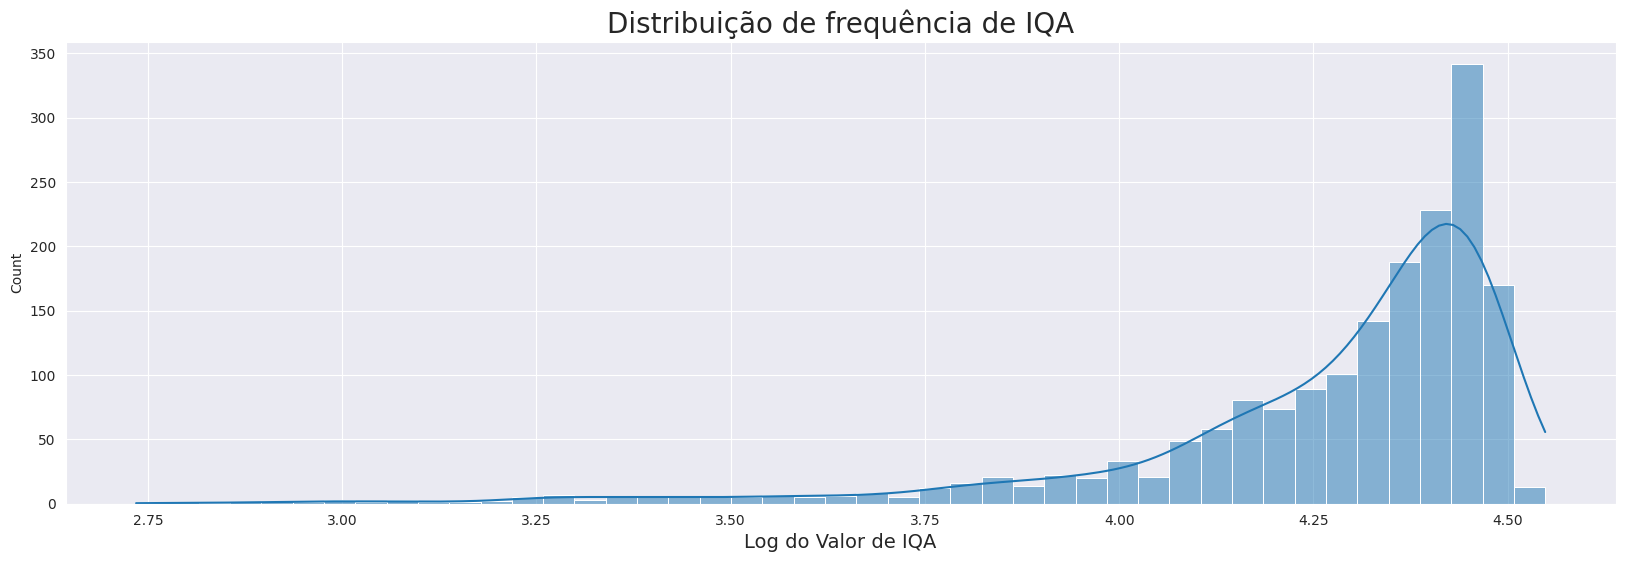

In [ ]:
ax=sns.histplot(data=dados_final, x="log_IQA", kde=True)

ax.figure.set_size_inches(20, 6)
ax.set_title("Distribuição de frequência de IQA", fontsize=20)
ax.set_xlabel("Log do Valor de IQA", fontsize=14)
plt.show()

**Verificando a relação linear**

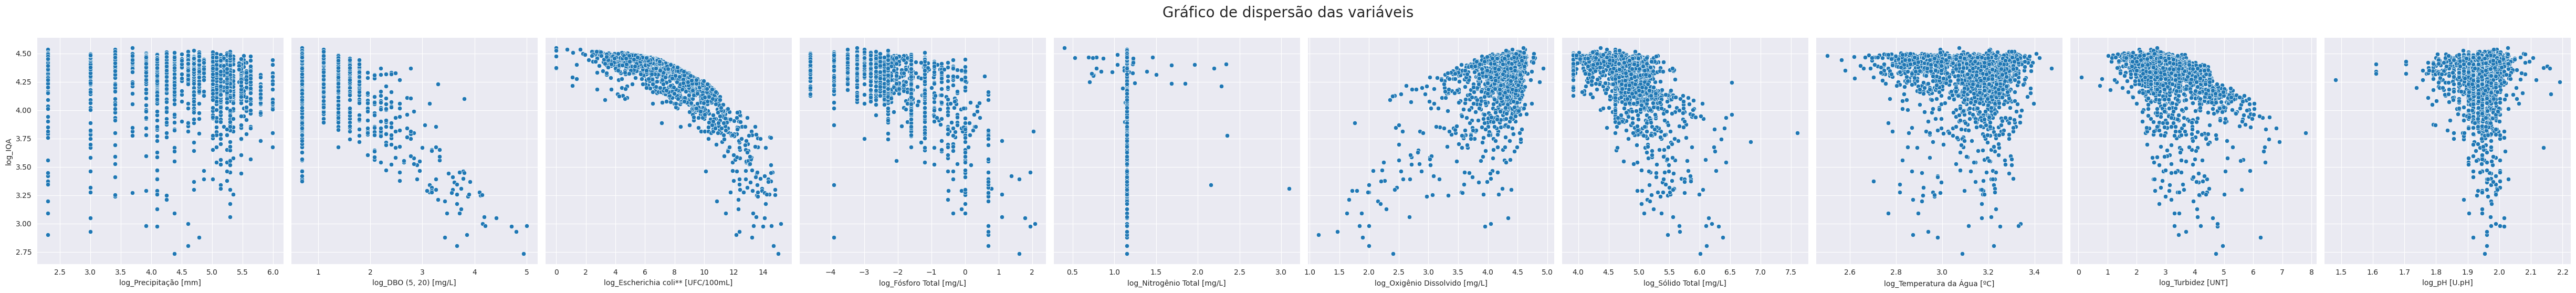

In [ ]:
ax = sns.pairplot(data=dados_final, y_vars="log_IQA", x_vars=['log_Precipitação [mm]', 'log_DBO (5, 20) [mg/L]',
       'log_Escherichia coli** [UFC/100mL]', 'log_Fósforo Total [mg/L]',
       'log_Nitrogênio Total [mg/L]', 'log_Oxigênio Dissolvido [mg/L]',
       'log_Sólido Total [mg/L]', 'log_Temperatura da Água [ºC]', 'log_Turbidez [UNT]',
       'log_pH [U.pH]'], height=5)

ax.figure.suptitle("Gráfico de dispersão das variáveis", fontsize=20, y=1.10)
plt.show()

# **PREPARANDO OS DADOS**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y = dados_final['log_IQA']
X = dados_final[['log_Precipitação [mm]', 'log_DBO (5, 20) [mg/L]',
       'log_Escherichia coli** [UFC/100mL]', 'log_Fósforo Total [mg/L]',
       'log_Nitrogênio Total [mg/L]', 'log_Oxigênio Dissolvido [mg/L]',
       'log_Sólido Total [mg/L]', 'log_Temperatura da Água [ºC]', 'log_Turbidez [UNT]',
       'log_pH [U.pH]']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

Parametro,log_Precipitação [mm],"log_DBO (5, 20) [mg/L]",log_Escherichia coli** [UFC/100mL],log_Fósforo Total [mg/L],log_Nitrogênio Total [mg/L],log_Oxigênio Dissolvido [mg/L],log_Sólido Total [mg/L],log_Temperatura da Água [ºC],log_Turbidez [UNT],log_pH [U.pH]
1509,2.995732,0.693147,4.521789,-2.525729,1.153732,4.446746,4.499810,2.995732,2.433613,1.974081
84,5.799093,0.693147,7.600902,-1.609438,1.153732,4.593648,5.075174,3.109061,4.905275,1.916923
1739,3.912023,2.772589,9.903488,-2.207275,1.153732,4.213470,4.672829,3.288402,2.397895,1.960095
1001,3.912023,1.098612,9.615805,-2.302585,1.153732,4.322448,4.605170,2.995732,2.772589,1.945910
1575,2.302585,2.397895,10.275051,-0.040822,1.153732,3.189043,5.288267,3.148453,2.944439,1.965713
...,...,...,...,...,...,...,...,...,...,...
1130,4.787492,0.693147,6.086775,-4.605170,1.153732,4.481392,4.077537,3.222868,2.639057,1.943049
1294,5.298317,0.693147,6.396930,-2.813411,1.153732,4.463538,4.624973,3.161247,3.806662,1.880991
860,2.302585,0.693147,4.941642,-1.609438,1.153732,4.282298,4.897840,2.827314,2.564949,1.974081
1459,3.912023,1.945910,11.314475,-1.609438,1.153732,4.138339,4.882802,3.321432,2.944439,1.960095


In [ ]:
X_test.shape

(535, 10)

# **Avaliando as estatísticas do modelo com Statsmodels**

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
X_train_com_constante.head()

,const,log_Precipitação [mm],"log_DBO (5, 20) [mg/L]",log_Escherichia coli** [UFC/100mL],log_Fósforo Total [mg/L],log_Nitrogênio Total [mg/L],log_Oxigênio Dissolvido [mg/L],log_Sólido Total [mg/L],log_Temperatura da Água [ºC],log_Turbidez [UNT],log_pH [U.pH]
1509,1.0,2.995732,0.693147,4.521789,-2.525729,1.153732,4.446746,4.499810,2.995732,2.433613,1.974081
84,1.0,5.799093,0.693147,7.600902,-1.609438,1.153732,4.593648,5.075174,3.109061,4.905275,1.916923
1739,1.0,3.912023,2.772589,9.903488,-2.207275,1.153732,4.213470,4.672829,3.288402,2.397895,1.960095
1001,1.0,3.912023,1.098612,9.615805,-2.302585,1.153732,4.322448,4.605170,2.995732,2.772589,1.945910
1575,1.0,2.302585,2.397895,10.275051,-0.040822,1.153732,3.189043,5.288267,3.148453,2.944439,1.965713


In [ ]:
modelo_statsmodel = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()
print(modelo_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                log_IQA   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:25:09   Log-Likelihood:                 1606.1
No. Observations:                1248   AIC:                            -3190.
Df Residuals:                    1237   BIC:                            -3134.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

# **Treinando o Modelo**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
X_train_novo = X_train.drop(['log_Nitrogênio Total [mg/L]','log_Temperatura da Água [ºC]'], axis=1)
X_test_novo = X_test.drop(['log_Nitrogênio Total [mg/L]','log_Temperatura da Água [ºC]'], axis=1)

In [ ]:
X_train_novo.head()

Parametro,log_Precipitação [mm],"log_DBO (5, 20) [mg/L]",log_Escherichia coli** [UFC/100mL],log_Fósforo Total [mg/L],log_Oxigênio Dissolvido [mg/L],log_Sólido Total [mg/L],log_Turbidez [UNT],log_pH [U.pH]
1509,2.995732,0.693147,4.521789,-2.525729,4.446746,4.499810,2.433613,1.974081
84,5.799093,0.693147,7.600902,-1.609438,4.593648,5.075174,4.905275,1.916923
1739,3.912023,2.772589,9.903488,-2.207275,4.213470,4.672829,2.397895,1.960095
1001,3.912023,1.098612,9.615805,-2.302585,4.322448,4.605170,2.772589,1.945910
1575,2.302585,2.397895,10.275051,-0.040822,3.189043,5.288267,2.944439,1.965713


In [ ]:
modelo = LinearRegression()
modelo.fit(X_train_novo, y_train)

LinearRegression()

**R² dos dados de treino**

In [ ]:
print(f"R²={modelo.score(X_train_novo, y_train)}")

R²=0.9405842598828411


# **Gerando a previsão para dados de teste do modelo**

In [ ]:
y_previsto = modelo.predict(X_test_novo)

In [ ]:
print(f"R²={metrics.r2_score(y_test , y_previsto)}")

R²=0.9219800422143641


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_previsto))

print(f"RMSE (Teste): {rmse}")

RMSE (Teste): 0.06514792113648242


In [ ]:
mse = rmse**2

print(f"MSE (Teste): {mse}")

MSE (Teste): 0.004244251628405333


In [ ]:
y_train_pred = modelo.predict(X_train_novo)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"RMSE (Treino): {rmse_train}")

RMSE (Treino): 0.06689432866020785


In [ ]:
mse_train = rmse_train**2

print(f"MSE (Treino): {mse}")

MSE (Treino): 0.004244251628405333


In [ ]:
X_test_novo.head()

Parametro,log_Precipitação [mm],"log_DBO (5, 20) [mg/L]",log_Escherichia coli** [UFC/100mL],log_Fósforo Total [mg/L],log_Oxigênio Dissolvido [mg/L],log_Sólido Total [mg/L],log_Turbidez [UNT],log_pH [U.pH]
824,5.298317,0.693147,3.401197,-2.659260,4.589248,3.912023,3.044522,2.080691
1472,5.634790,0.693147,8.935904,-2.302585,4.236132,5.590987,2.302585,2.066863
233,2.302585,0.693147,5.356586,-2.813411,4.528880,3.912023,2.740840,1.974081
798,2.302585,0.693147,5.736572,-2.659260,4.459381,4.605170,2.397895,2.014903
777,5.347108,1.098612,9.740969,-1.609438,4.257310,4.718499,4.510860,1.945910


**Estatísticas descritivas do IQA previsto**

In [ ]:
iqa_previsto_original = np.exp(y_previsto)

In [ ]:
 iqa_previsto_original_series = pd.Series(iqa_previsto_original)
 iqa_previsto_original_series.describe()

,0
count,535.000000
mean,73.291619
std,14.284502
min,24.994430
25%,66.551145
50%,74.651687
75%,83.863072
max,102.941461


# **Modelo**

In [ ]:
modelo.feature_names_in_

array(['log_Precipitação [mm]', 'log_DBO (5, 20) [mg/L]',
       'log_Escherichia coli** [UFC/100mL]', 'log_Fósforo Total [mg/L]',
       'log_Oxigênio Dissolvido [mg/L]', 'log_Sólido Total [mg/L]',
       'log_Turbidez [UNT]', 'log_pH [U.pH]'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np

**teste 1**

In [ ]:
novos_parametros1 = pd.DataFrame({
    "log_Precipitação [mm]": [np.log(100)],
    'log_DBO (5, 20) [mg/L]': [np.log(2)],
    "log_Escherichia coli** [UFC/100mL]": [np.log(58000)],
    'log_Fósforo Total [mg/L]': [np.log(0.07)],
    "log_Oxigênio Dissolvido [mg/L]": [np.log(68)],
    "log_Sólido Total [mg/L]": [np.log(258)],
    "log_Turbidez [UNT]": [np.log(120)],
    "log_pH [U.pH]": [np.log(7)]
})

In [ ]:
modelo.predict(novos_parametros1)[0]

3.990983906983472

In [ ]:
print(f"O valor de IQA é: {np.exp(modelo.predict(novos_parametros1)[0]): ,.2f}")

O valor de IQA é:  54.11


**teste 2**

In [ ]:
novos_parametros2 = pd.DataFrame({
   "log_Precipitação [mm]": [np.log(100)],
    'log_DBO (5, 20) [mg/L]': [np.log(3)],
    "log_Escherichia coli** [UFC/100mL]": [np.log(5200)],
    'log_Fósforo Total [mg/L]': [np.log(0.07)],
    "log_Oxigênio Dissolvido [mg/L]": [np.log(68)],
    "log_Sólido Total [mg/L]": [np.log(258)],
    "log_Turbidez [UNT]": [np.log(90)],
    "log_pH [U.pH]": [np.log(7.2)]
})

In [ ]:
modelo.predict(novos_parametros2)[0]

4.070896588380273

In [ ]:
print(f"O valor de IQA é: {np.exp(modelo.predict(novos_parametros2)[0]): ,.2f}")

O valor de IQA é:  58.61


# **Obtendo os coeficientes da regressão linear**

In [ ]:
modelo.intercept_

4.581635832546842

In [ ]:
np.exp(modelo.intercept_)

97.67404196978583

In [ ]:
modelo.coef_

array([ 0.00773332, -0.11120619, -0.04577987,  0.0056563 ,  0.21487988,
       -0.06328289, -0.06469091, -0.1426538 ])

In [ ]:
X_train_novo.columns

Index(['log_Precipitação [mm]', 'log_DBO (5, 20) [mg/L]',
       'log_Escherichia coli** [UFC/100mL]', 'log_Fósforo Total [mg/L]',
       'log_Oxigênio Dissolvido [mg/L]', 'log_Sólido Total [mg/L]',
       'log_Turbidez [UNT]', 'log_pH [U.pH]'],
      dtype='object', name='Parametro')

In [ ]:
index = ['Intercepto','log_Precipitação [mm]', 'log_DBO (5, 20) [mg/L]',
       'log_Escherichia coli** [UFC/100mL]', 'log_Fósforo Total [mg/L]',
       'log_Oxigênio Dissolvido [mg/L]', 'log_Sólido Total [mg/L]',
       'log_Turbidez [UNT]', 'log_pH [U.pH]']

In [ ]:
df_params = pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parametros'])

In [ ]:
df_params.round(3)

,Parametros
Intercepto,4.582
log_Precipitação [mm],0.008
"log_DBO (5, 20) [mg/L]",-0.111
log_Escherichia coli** [UFC/100mL],-0.046
log_Fósforo Total [mg/L],0.006
log_Oxigênio Dissolvido [mg/L],0.215
log_Sólido Total [mg/L],-0.063
log_Turbidez [UNT],-0.065
log_pH [U.pH],-0.143


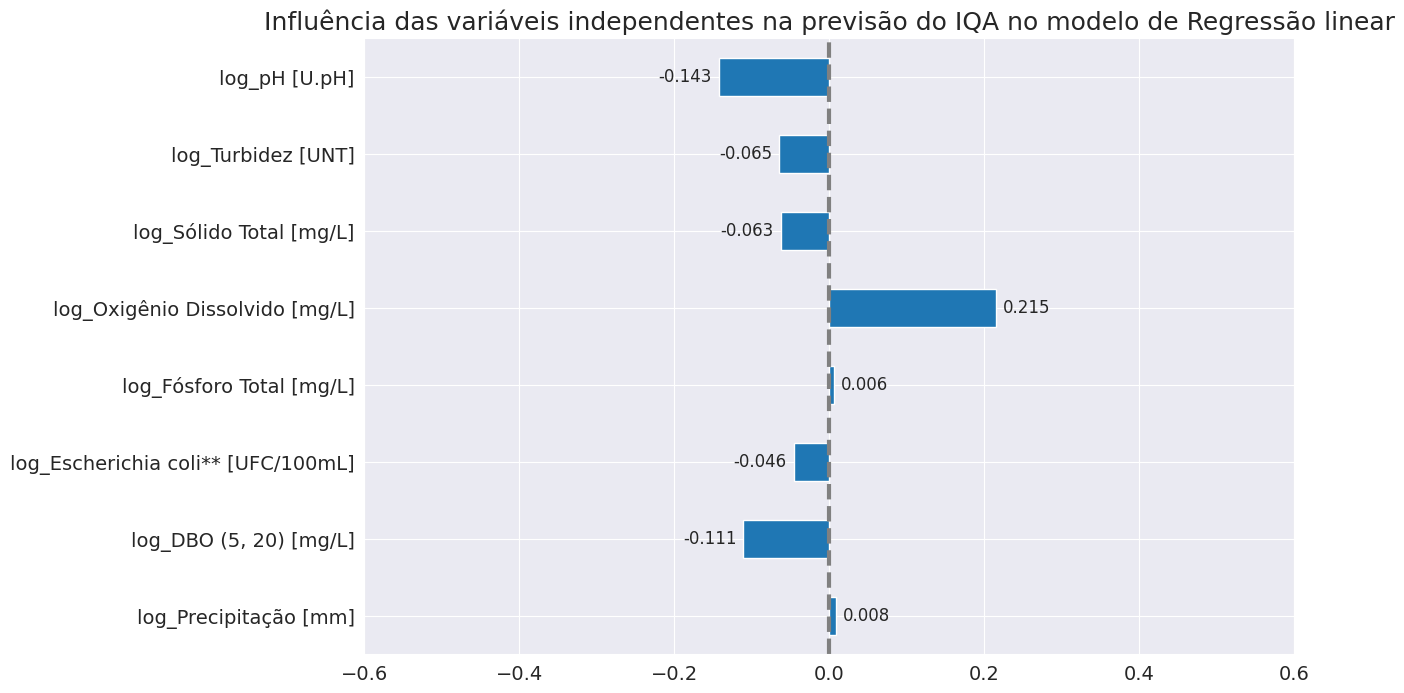

In [ ]:
ax = df_params[1:].round(3).plot(kind='barh', figsize=(12, 8), legend=False)
ax.bar_label(ax.containers[0], size=12, padding=5)

ax.set_title('Influência das variáveis independentes na previsão do IQA no modelo de Regressão linear', loc='center', size = 18)
ax.axvline(x=0, color="grey", lw=3, linestyle='dashed')
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(-0.6,0.6)
plt.show()

In [ ]:
StandardScaler

sklearn.preprocessing._data.StandardScaler

**Interpretando os coeficientes estimados**

**Oxigênio Dissolvido** → Mantendo-se os valores de todas as outras variáveis explicativas constantes, um acréscimo de 1% no Oxigênio Dissolvido gera, em média, um **acréscimo de 0.212%** no Valor do IQA.

**Turbidez** → Mantendo-se os valores de todas as outras variáveis explicativas constantes, um acréscimo de 1% na Turbidez gera, em média, um **decréscimo de 0.063%** no Valor do IQA.


# **Analisando graficamente os resultados do modelo**

In [ ]:
y_train_previsto = modelo.predict(X_train_novo)

**Gráfico de dispersão entre o valor estimado e real**

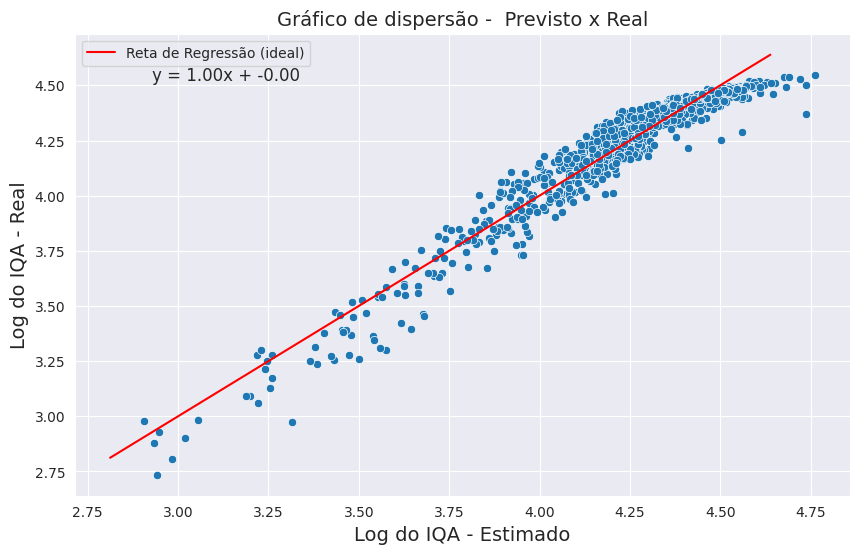

In [ ]:
ax = sns.scatterplot(x=y_train_previsto, y=y_train)

ax.figure.set_size_inches(10, 6)
ax.set_title("Gráfico de dispersão -  Previsto x Real", fontsize=14)
ax.set_xlabel("Log do IQA - Estimado", fontsize=14)
ax.set_ylabel("Log do IQA - Real", fontsize=14)

x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
ax.plot(lims, lims, '-r', label='Reta de Regressão (ideal)')

slope, intercept = np.polyfit(y_train_previsto, y_train, 1)
reg_line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

ax.text(0.1, 0.9, reg_line_eq, transform=ax.transAxes, fontsize=12)
plt.legend()

plt.show()

**Resíduos**

In [ ]:
residuo = y_train - y_train_previsto

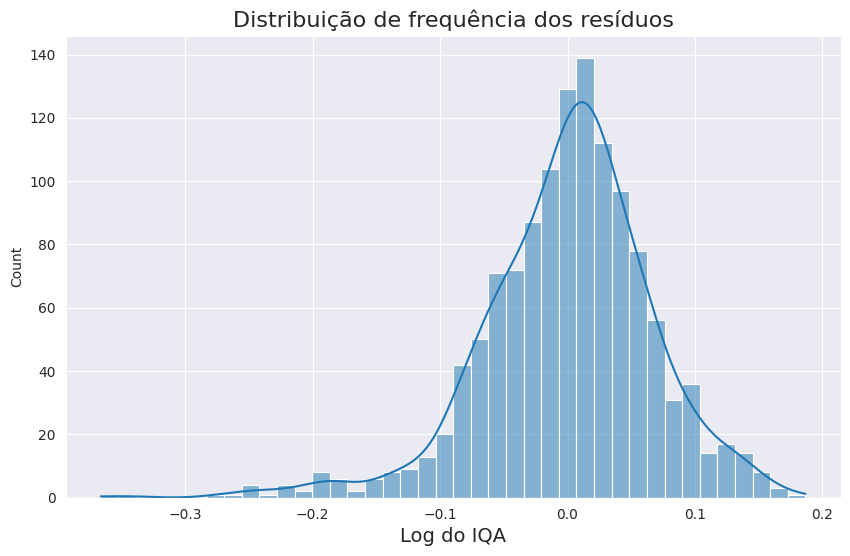

In [ ]:
ax = sns.histplot(residuo, kde=True)

ax.figure.set_size_inches(10, 6)
ax.set_title("Distribuição de frequência dos resíduos", fontsize=16)
ax.set_xlabel("Log do IQA", fontsize=14)
plt.show()

**Homocedasticidade do modelo**

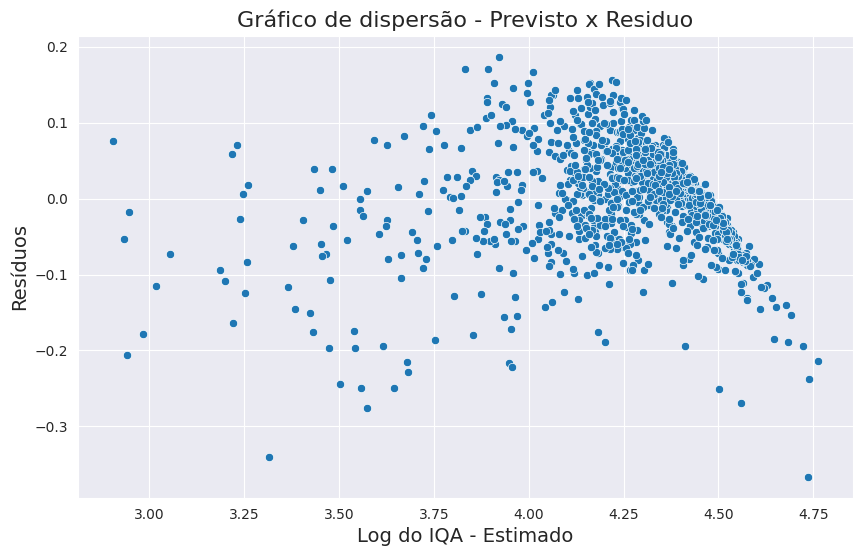

In [ ]:
ax = sns.scatterplot(x=y_train_previsto, y=residuo)

ax.figure.set_size_inches(10, 6)
ax.set_title("Gráfico de dispersão - Previsto x Residuo", fontsize=16)
ax.set_xlabel("Log do IQA - Estimado", fontsize=14)
ax.set_ylabel("Resíduos", fontsize=14)
plt.show()

**Salvando o modelo e prevendo mais casas**

In [ ]:
import pickle

In [ ]:
arquivo = open('modelo_iqa.pkl', 'wb')
pickle.dump(modelo, arquivo)
arquivo.close()